In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the data
file_path = '/Users/namirsacic/Desktop/Masterarbeit/ECDC_surveillance_data_Antimicrobial_resistance.csv'
data = pd.read_csv(file_path)

In [3]:
# Initial data inspection
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85215 entries, 0 to 85214
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HealthTopic  85215 non-null  object 
 1   Population   85215 non-null  object 
 2   Indicator    85215 non-null  object 
 3   Unit         85215 non-null  object 
 4   Time         85215 non-null  int64  
 5   RegionCode   85215 non-null  object 
 6   RegionName   85215 non-null  object 
 7   NumValue     85215 non-null  object 
 8   TxtValue     0 non-null      float64
dtypes: float64(1), int64(1), object(7)
memory usage: 5.9+ MB


In [4]:
# Initial data inspection
head = data.head()
print(head)

                HealthTopic                          Population   
0  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides  \
1  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   
2  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   
3  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   
4  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   

                                         Indicator Unit  Time RegionCode   
0  I - 'susceptible, increased exposure' isolates     N  2012         AT  \
1  I - 'susceptible, increased exposure' isolates     N  2012         BE   
2  I - 'susceptible, increased exposure' isolates     N  2012         BG   
3  I - 'susceptible, increased exposure' isolates     N  2012         CY   
4  I - 'susceptible, increased exposure' isolates     N  2012         CZ   

  RegionName     NumValue  TxtValue  
0    Austria  0.000000000       NaN  
1    Belgium  0.000000000       NaN  
2   Bulgaria  6.000000000 

In [5]:
# Summarize key statistics
description = data.describe()
print(description)

               Time  TxtValue
count  85215.000000       0.0
mean    2012.695394       NaN
std        5.969881       NaN
min     2000.000000       NaN
25%     2008.000000       NaN
50%     2013.000000       NaN
75%     2018.000000       NaN
max     2022.000000       NaN


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

HealthTopic        0
Population         0
Indicator          0
Unit               0
Time               0
RegionCode         0
RegionName         0
NumValue           0
TxtValue       85215
dtype: int64


In [7]:
# Convert 'NumValue' to a float, while replacing non-numeric values with NaN
data['NumValue'] = pd.to_numeric(data['NumValue'], errors='coerce')

# Now let's check again for missing values after conversion
missing_values_updated = data.isnull().sum()

# Convert 'Time' to a datetime object
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

# Check the first few entries of the dataset after conversion
head_after_conversion = data.head()



In [8]:
print(head_after_conversion)

                HealthTopic                          Population   
0  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides  \
1  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   
2  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   
3  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   
4  Antimicrobial resistance  Acinetobacter spp.|Aminoglycosides   

                                         Indicator Unit       Time RegionCode   
0  I - 'susceptible, increased exposure' isolates     N 2012-01-01         AT  \
1  I - 'susceptible, increased exposure' isolates     N 2012-01-01         BE   
2  I - 'susceptible, increased exposure' isolates     N 2012-01-01         BG   
3  I - 'susceptible, increased exposure' isolates     N 2012-01-01         CY   
4  I - 'susceptible, increased exposure' isolates     N 2012-01-01         CZ   

  RegionName  NumValue  TxtValue  
0    Austria       0.0       NaN  
1    Belgium       0.0       NaN  
2   B

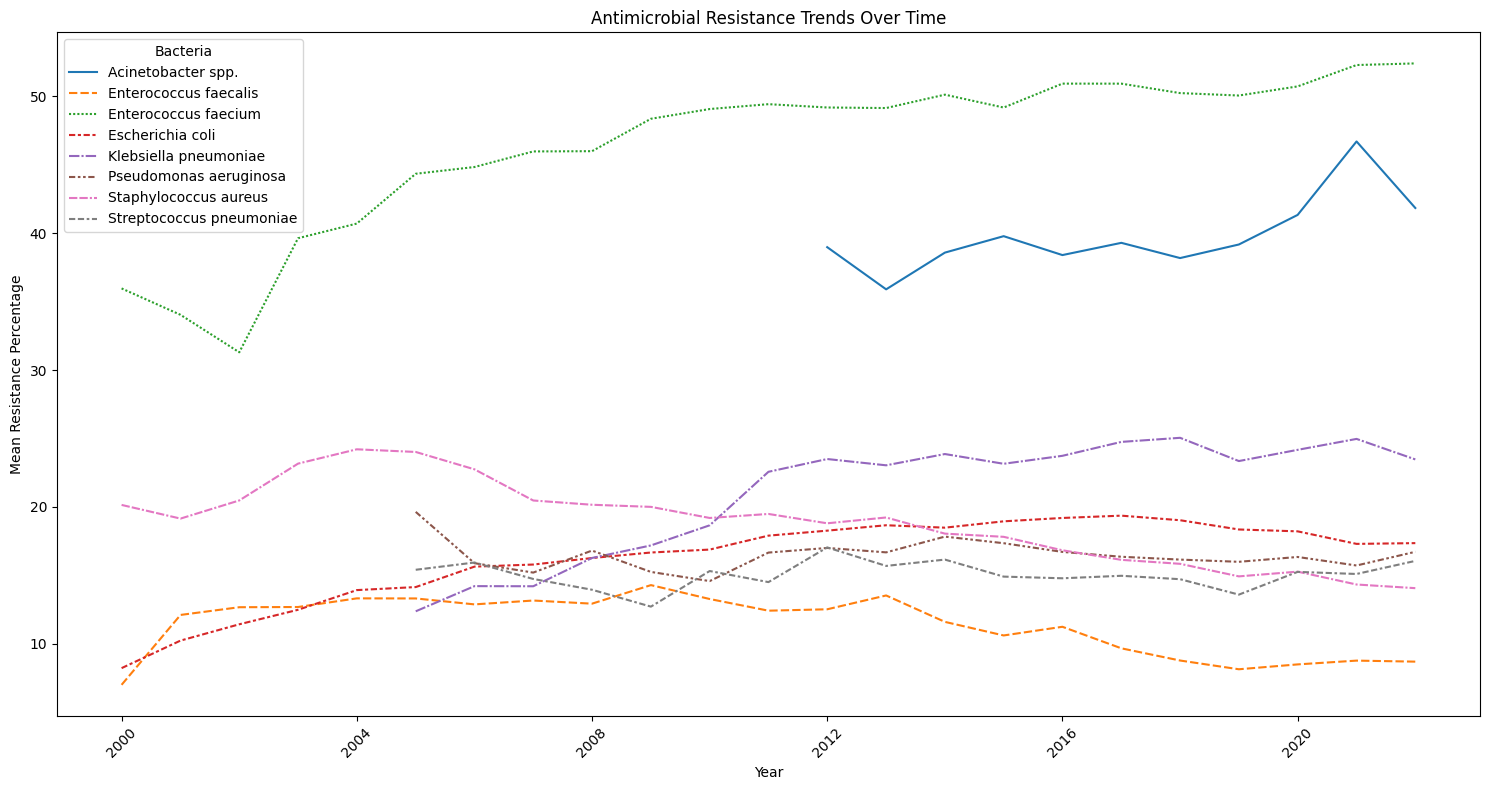

In [9]:
# We will need to split the 'Population' field into 'Bacteria' and 'Antibiotic' for better analysis.
data[['Bacteria', 'Antibiotic']] = data['Population'].str.split('|', expand=True)

# Aggregate the data by year and bacteria for resistance indicators
resistance_data = data[data['Indicator'].str.contains('resistant isolates, percentage')]

# Group by Time and Bacteria and calculate the mean resistance percentage
resistance_trends = resistance_data.groupby(['Time', 'Bacteria'])['NumValue'].mean().reset_index()

# Pivot the data for plotting
resistance_trends_pivot = resistance_trends.pivot(index='Time', columns='Bacteria', values='NumValue')

# Plotting the trends over time for each bacteria
plt.figure(figsize=(15, 8))
sns.lineplot(data=resistance_trends_pivot)
plt.title('Antimicrobial Resistance Trends Over Time')
plt.ylabel('Mean Resistance Percentage')
plt.xlabel('Year')
plt.legend(title='Bacteria', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

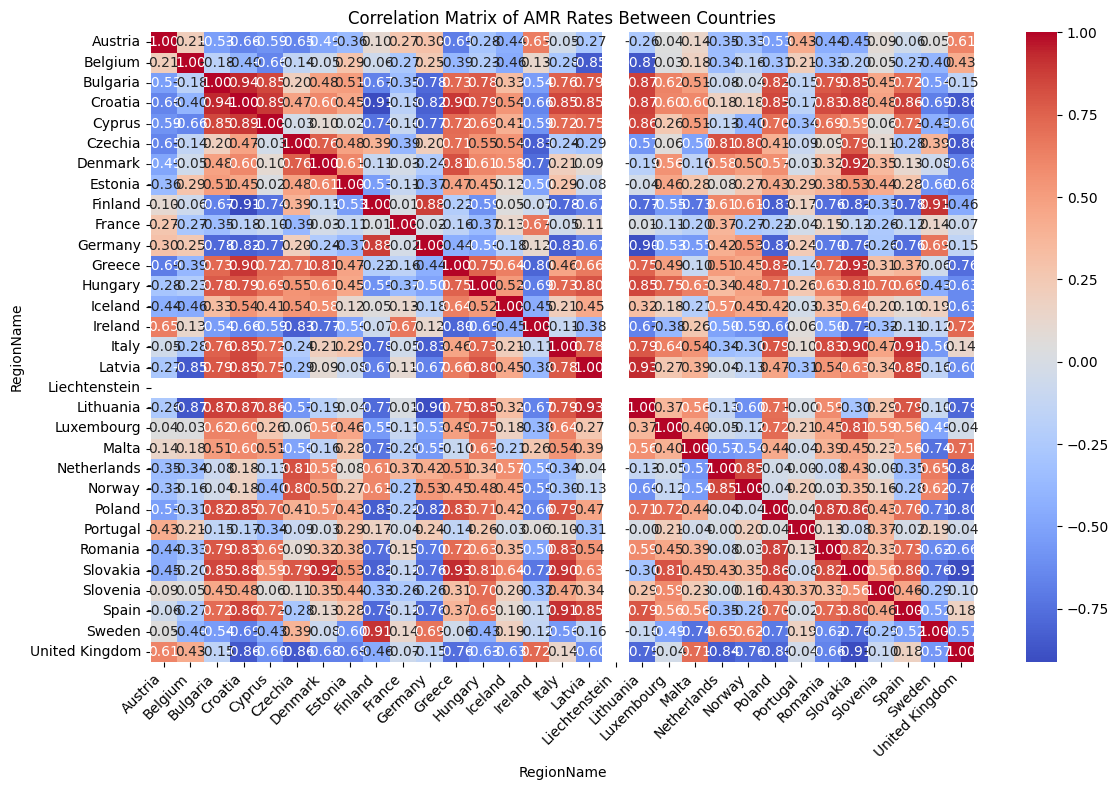

In [10]:
# Since we're interested in the correlation between countries, we need to pivot the data accordingly.
# We will pivot the data to have countries as columns and resistance percentage as values.
# We are assuming that the 'RegionName' column contains the country names and 'NumValue' column the resistance percentage.

# Let's first clean the data, convert 'NumValue' to float, and 'Time' to a datetime object
data['NumValue'] = pd.to_numeric(data['NumValue'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

# Now, let's aggregate the data by 'Time' and 'RegionName' for 'NumValue' which is the resistance percentage.
# We will only consider rows where 'Indicator' contains 'resistant isolates, percentage'.
resistance_data = data[data['Indicator'].str.contains('resistant isolates, percentage')]

# Group by Time and RegionName and calculate the mean resistance percentage
country_resistance_trends = resistance_data.groupby(['Time', 'RegionName'])['NumValue'].mean().unstack()

# Calculate the correlation matrix for countries
country_correlation_matrix = country_resistance_trends.corr()

# Plotting the heatmap for the country correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(country_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of AMR Rates Between Countries')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [11]:
import pandas as pd

# We need to filter the data for the 'resistant isolates, percentage' indicator
# as we are interested in the change point analysis for resistance percentages.
data = data[data['Indicator'].str.contains('R - resistant isolates, percentage')]

# Convert 'NumValue' to a float, while replacing non-numeric values with NaN
data['NumValue'] = pd.to_numeric(data['NumValue'], errors='coerce')

# Convert 'Time' to a datetime object and extract the year for ease of analysis
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

# Drop rows with missing values in 'NumValue' which are essential for the analysis
data = data.dropna(subset=['NumValue'])

# The 'Population' field contains both the bacteria and antibiotic names, we will split them for clarity
data[['Bacteria', 'Antibiotic']] = data['Population'].str.split('|', expand=True)

# Now we will perform a simple CUSUM analysis on each bacteria's time series
change_points_results = {}

# Iterate through each bacteria
for bacteria, group_data in data.groupby('Bacteria'):
    # Extract the time series of AMR rates for the current bacteria
    time_series = group_data.sort_values('Time').set_index('Time')['NumValue']
    
    # Perform CUSUM analysis
    # Calculate the cumulative sum of the deviations from the mean
    cumsum = (time_series - time_series.mean()).cumsum()
    # Detect potential change points where the CUSUM is at its max or min
    change_points = cumsum.idxmin(), cumsum.idxmax()
    
    # Store the results
    change_points_results[bacteria] = change_points

# Let's print out the detected change points for each bacteria as a demonstration
change_points_results


{'Acinetobacter spp.': (Timestamp('2020-01-01 00:00:00'),
  Timestamp('2012-01-01 00:00:00')),
 'Enterococcus faecalis': (Timestamp('2002-01-01 00:00:00'),
  Timestamp('2015-01-01 00:00:00')),
 'Enterococcus faecium': (Timestamp('2011-01-01 00:00:00'),
  Timestamp('2000-01-01 00:00:00')),
 'Escherichia coli': (Timestamp('2007-01-01 00:00:00'),
  Timestamp('2022-01-01 00:00:00')),
 'Klebsiella pneumoniae': (Timestamp('2011-01-01 00:00:00'),
  Timestamp('2022-01-01 00:00:00')),
 'Pseudomonas aeruginosa': (Timestamp('2011-01-01 00:00:00'),
  Timestamp('2018-01-01 00:00:00')),
 'Staphylococcus aureus': (Timestamp('2000-01-01 00:00:00'),
  Timestamp('2013-01-01 00:00:00')),
 'Streptococcus pneumoniae': (Timestamp('2010-01-01 00:00:00'),
  Timestamp('2014-01-01 00:00:00'))}

In [18]:
import ruptures as rpt
import pandas as pd
import numpy as np

# Your preprocessing steps here

# Now we will perform a change point analysis using the ruptures package for each bacteria's time series
change_points_results = {}

# Iterate through each bacteria
for bacteria, group_data in data.groupby('Bacteria'):
    # Extract the time series of AMR rates for the current bacteria
    time_series = group_data.sort_values('Time')['NumValue'].values
    
    # Assuming we have enough data points per bacteria, let's apply the ruptures algorithm
    if len(time_series) > 1:  # We need at least 2 data points to apply change point detection
        # Define the model and the Pelt search method
        model = "l1"  # "l1" norm minimization for change point detection
        algo = rpt.Pelt(model=model).fit(time_series)
        
        # Set the penalty value, you may need to adjust this depending on your data
        penalty_value = np.log(len(time_series)) * (time_series.var())
        
        # Predict the change points
        result = algo.predict(pen=penalty_value)
        
        # Store the results, the index for the time series needs to be reset to match the original dates
        change_points_results[bacteria] = group_data.iloc[result[:-1]].index.tolist()

        # If the result is empty, it might be useful to investigate further or try different parameters
        if not result[:-1]:  # If no change points were detected
            print(f"No change points detected for {bacteria} with penalty {penalty_value}.")
        # Optional: Try other algorithms or parameters
# change_points_results will be a dictionary with bacteria as keys and change point indices as values


No change points detected for Acinetobacter spp. with penalty 8646.587360751431.
No change points detected for Enterococcus faecalis with penalty 2010.6424913776968.
No change points detected for Enterococcus faecium with penalty 8923.288600077569.
No change points detected for Escherichia coli with penalty 2998.0384679445.
No change points detected for Klebsiella pneumoniae with penalty 3435.7450826453637.
No change points detected for Pseudomonas aeruginosa with penalty 1262.4090349950334.
No change points detected for Staphylococcus aureus with penalty 1618.2641945737905.
No change points detected for Streptococcus pneumoniae with penalty 555.3231354774567.


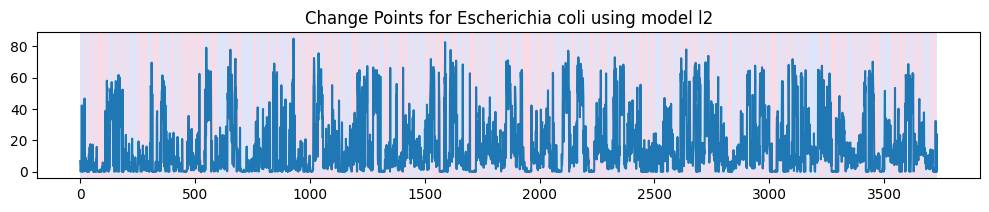

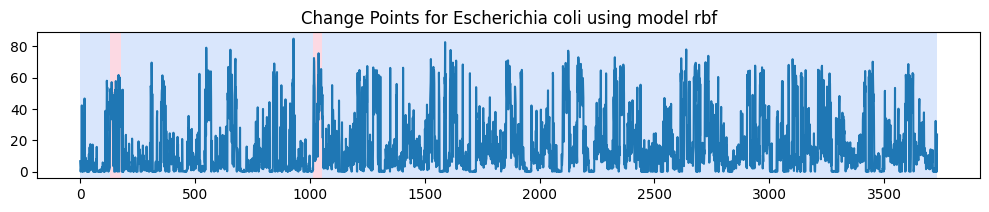

In [20]:
import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data here
data['NumValue'] = pd.to_numeric(data['NumValue'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%Y')
data.dropna(subset=['NumValue'], inplace=True)
data[['Bacteria', 'Antibiotic']] = data['Population'].str.split('|', expand=True)

# Select a bacteria for example
bacteria_name = 'Escherichia coli'
bacteria_data = data[data['Bacteria'] == bacteria_name]
bacteria_data = bacteria_data.sort_values('Time')

# Extract the resistance values
resistance_values = bacteria_data['NumValue'].values

# Set up models and penalty
models = ["l2", "rbf"]
penalty_value = 1.5 * np.log(len(resistance_values))  # Adjust this based on your dataset

# Iterate over models and perform change point detection
for model in models:
    algo = rpt.Pelt(model=model).fit(resistance_values)
    result = algo.predict(pen=penalty_value)

    # Plotting the results
    rpt.display(resistance_values, result)
    plt.title(f'Change Points for {bacteria_name} using model {model}')
    plt.show()


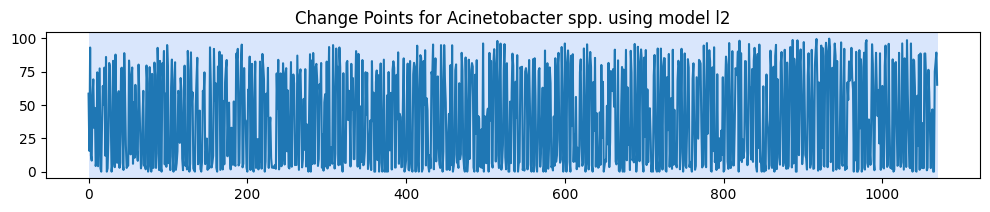

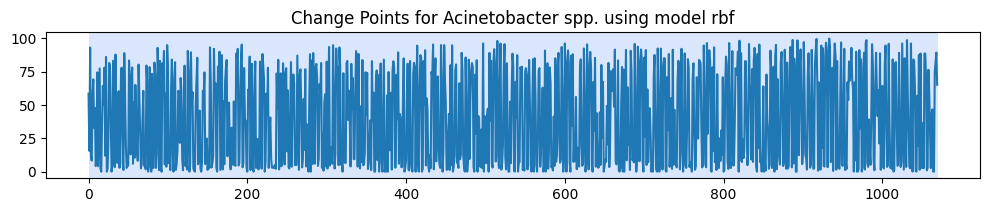

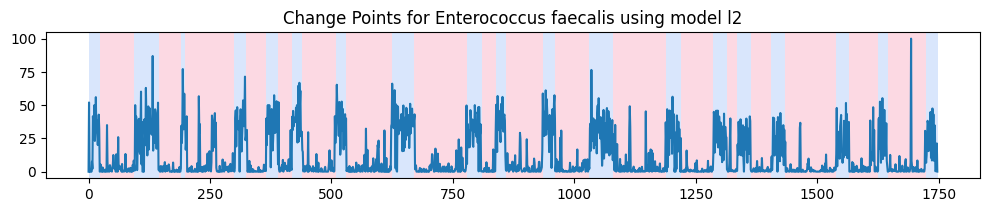

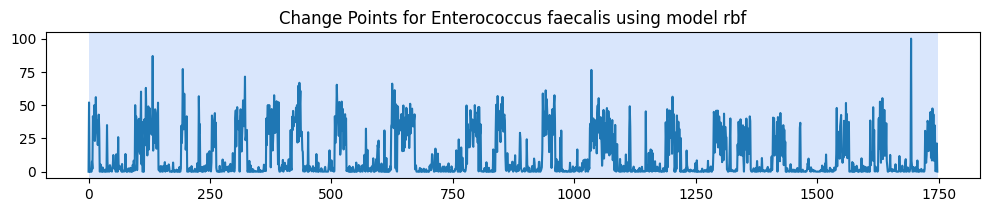

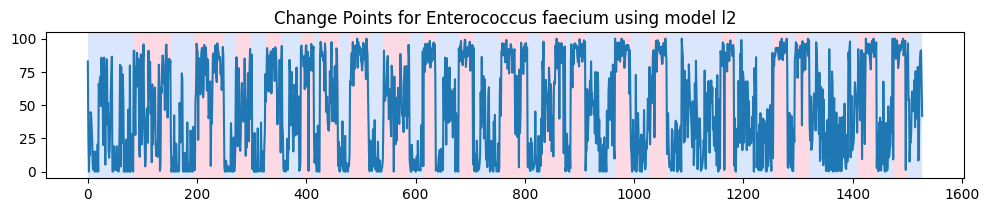

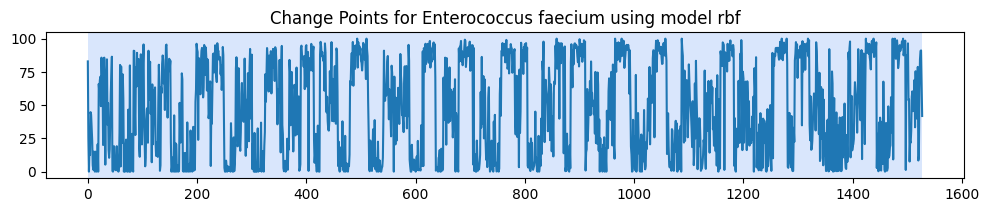

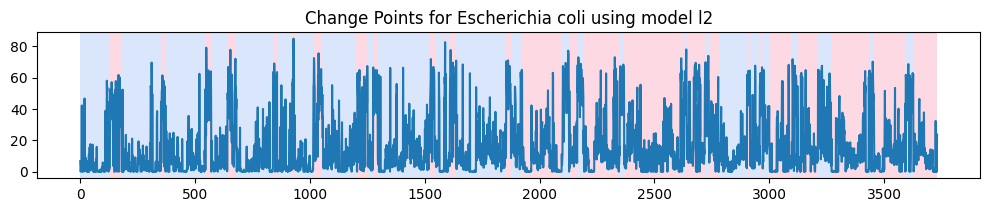

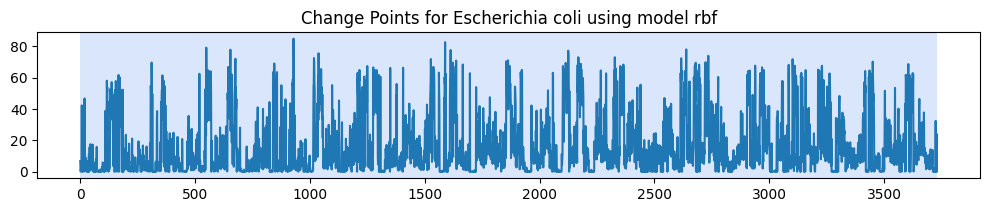

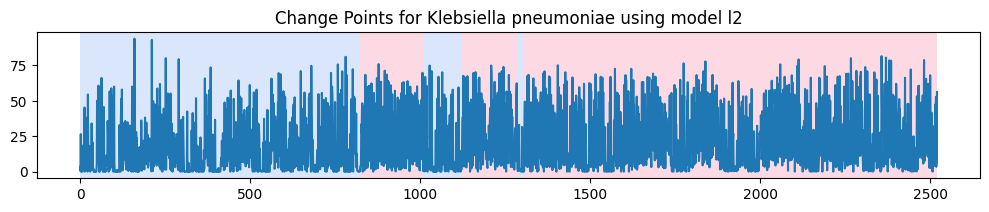

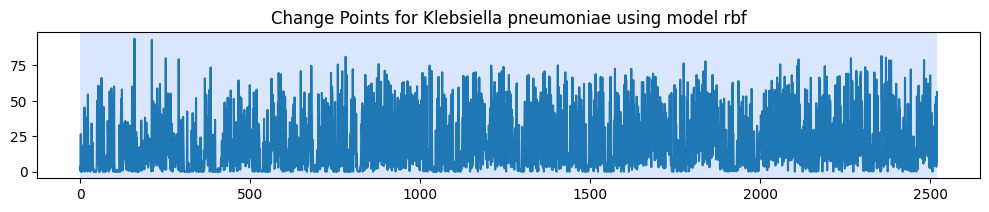

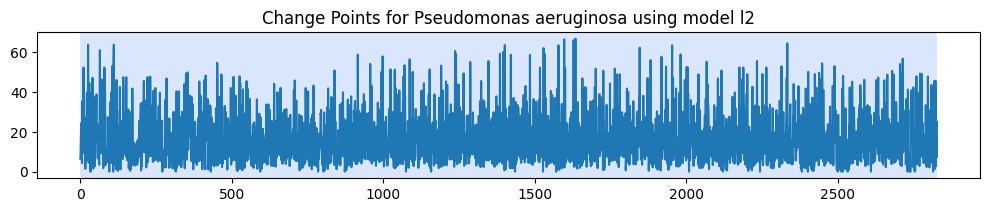

KeyboardInterrupt: 

In [21]:
import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming data has been preprocessed according to earlier steps

# Define a function to perform change point analysis with visualization
def perform_change_point_analysis(data, bacteria_name, model='l2', penalty_multiplier=1.5):
    bacteria_data = data[data['Bacteria'] == bacteria_name]
    bacteria_data = bacteria_data.sort_values('Time')

    resistance_values = bacteria_data['NumValue'].values

    penalty_value = penalty_multiplier * np.log(len(resistance_values)) * resistance_values.var()

    algo = rpt.Pelt(model=model).fit(resistance_values)
    result = algo.predict(pen=penalty_value)

    rpt.display(resistance_values, result)
    plt.title(f'Change Points for {bacteria_name} using model {model}')
    plt.show()

# Perform change point analysis for each bacteria
for bacteria_name in data['Bacteria'].unique():
    perform_change_point_analysis(data, bacteria_name, model='l2', penalty_multiplier=1.5)
    perform_change_point_analysis(data, bacteria_name, model='rbf', penalty_multiplier=1.5)


/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

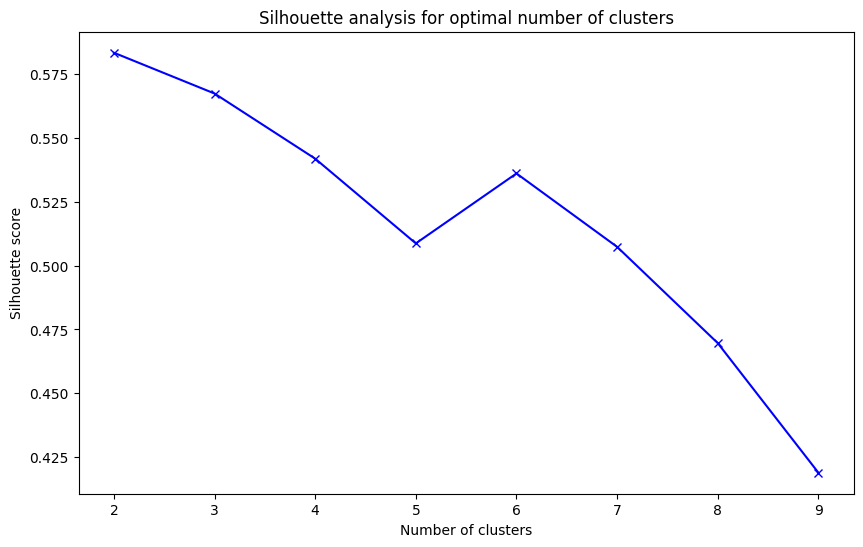

/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: The following variables cannot be assigned with wide-form data: `hue`, `style`

<Figure size 1500x800 with 0 Axes>

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'resistance_trends_pivot' is the DataFrame with time series data
# Each column is a bacteria, and each row is a time point with its mean resistance percentage

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(resistance_trends_pivot.fillna(0))

# Determine the optimal number of clusters using the silhouette score
range_n_clusters = list(range(2, 10))
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plot the silhouette scores to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal number of clusters')
plt.show()

# Choose the optimal number of clusters and run k-means clustering
optimal_clusters = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster information to the original DataFrame
resistance_trends_pivot['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(15, 8))
sns.lineplot(data=resistance_trends_pivot, hue='Cluster', style='Cluster', markers=True, dashes=False)
plt.title('Antimicrobial Resistance Trends Clustered Over Time')
plt.ylabel('Mean Resistance Percentage (Standardized)')
plt.xlabel('Year')
plt.legend(title='Cluster', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


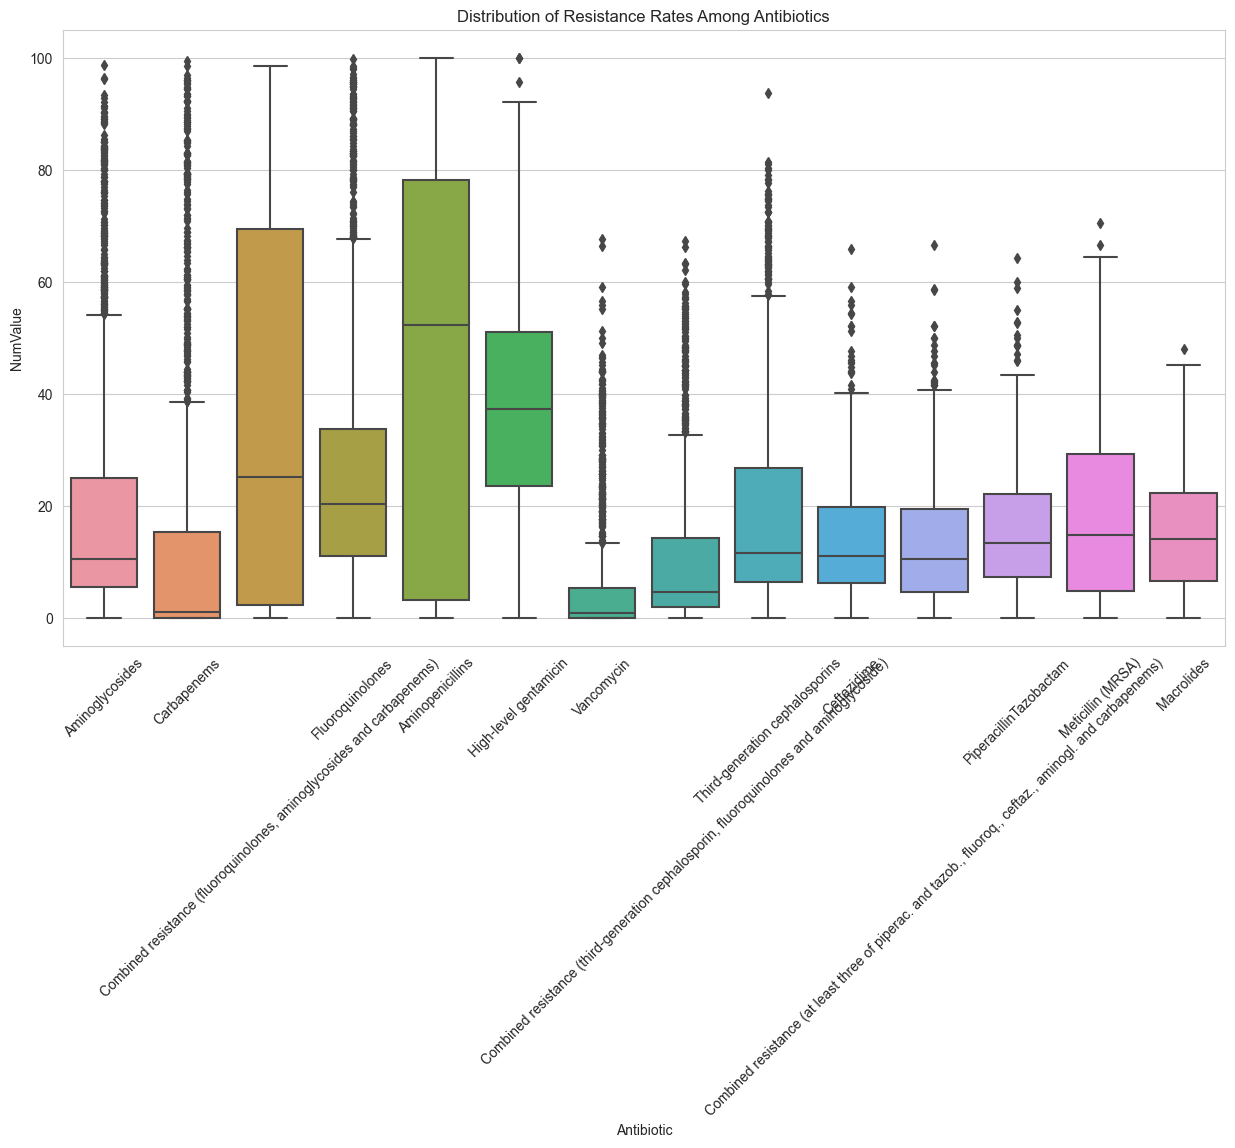

In [18]:
# Further EDA
# Plotting distribution of resistance rates for each antibiotic
plt.figure(figsize=(15, 8))
sns.boxplot(x='Antibiotic', y='NumValue', data=resistance_data)
plt.title('Distribution of Resistance Rates Among Antibiotics')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Statistical Tests: ANOVA to compare means across multiple groups
import scipy.stats as stats
anova_results = stats.f_oneway(
    data['NumValue'][data['Bacteria'] == 'Escherichia coli'],
    data['NumValue'][data['Bacteria'] == 'Staphylococcus aureus'],
    # add other bacteria groups as necessary
)
print('ANOVA results:', anova_results)

ANOVA results: F_onewayResult(statistic=nan, pvalue=nan)


In [25]:
# Predictive Modelling: ARIMA as an example for one bacteria
from statsmodels.tsa.arima.model import ARIMA

# Selecting the data for one bacteria
e_coli_data = resistance_data[resistance_data['Bacteria'] == 'Escherichia coli'].copy()
e_coli_data.set_index('Time', inplace=True)
e_coli_data.sort_index(inplace=True)

# Fit an ARIMA model
arima_model = ARIMA(e_coli_data['NumValue'], order=(1, 1, 1))
arima_results = arima_model.fit()

# Make predictions
predictions = arima_results.get_forecast(steps=5)  # Predict next 5 years
predictions.summary_frame()


ModuleNotFoundError: No module named 'statsmodels'

In [24]:
import sys
print(sys.executable)

/Applications/Xcode.app/Contents/Developer/usr/bin/python3
